In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
import random

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)

import matplotlib.image as mpimg
import shutil

In [3]:
#shutil.rmtree('/content/output')

In [4]:
artists = pd.read_csv('/content/artists.csv')

In [5]:
Albrecht_Durer = "Albrecht_Durer".replace("_", " ")
artists.iloc[19, 1] = Albrecht_Durer
artists = artists.sort_values(by=['paintings'], ascending=False)

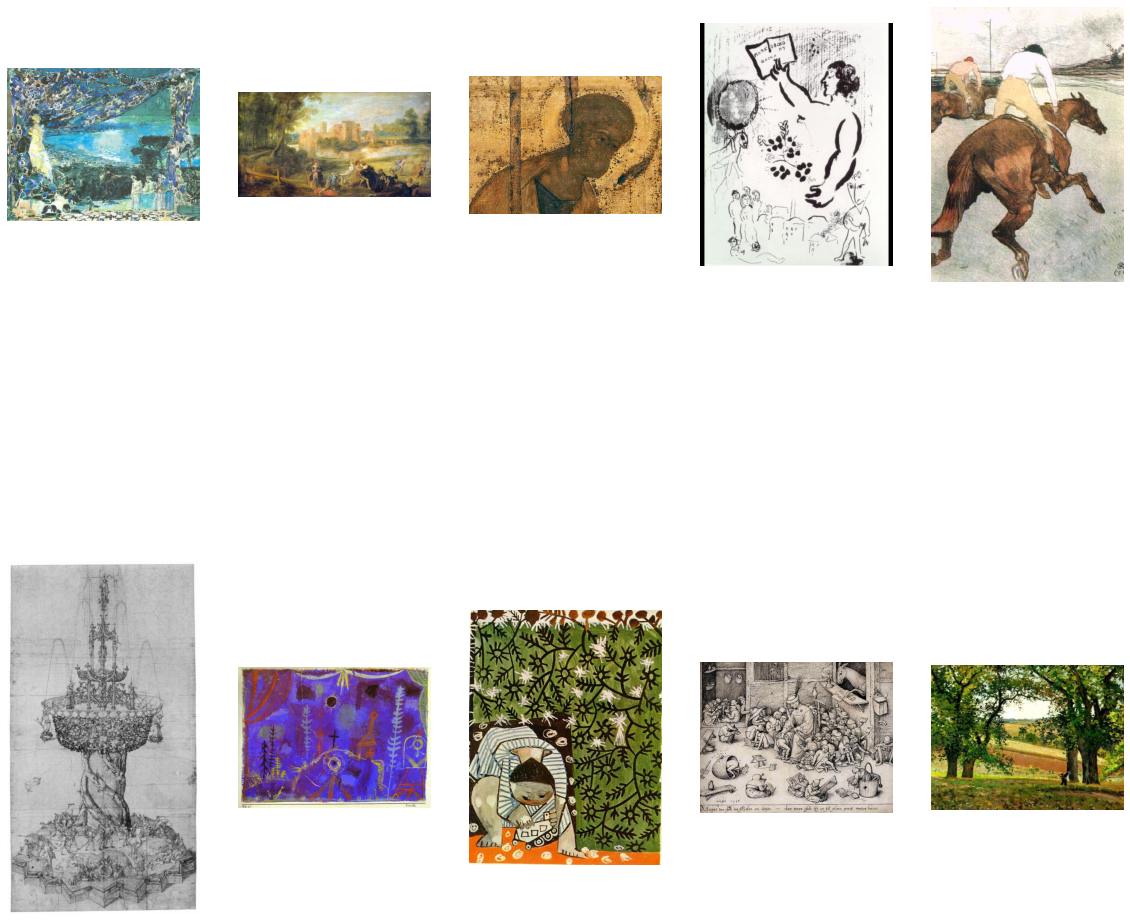

In [6]:
# Print few random paintings
artists_name = artists['name'].str.replace(' ', '_').values

plt.figure(figsize=(20, 20))
for i in range(10):
    random_artist = random.choice(artists_name)
    random_image = random.choice(os.listdir('/content/drive/MyDrive/images/images'))
    random_image_file = os.path.join('/content/drive/MyDrive/images/images', random_image)
    image = plt.imread(random_image_file)
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.axis("off")

plt.show()

[]

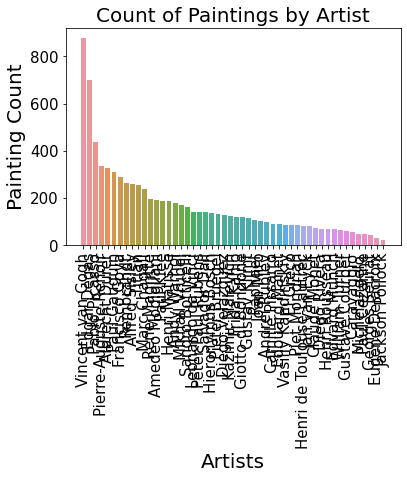

In [7]:
params = {'axes.labelsize' : 20,
          'axes.titlesize' : 20,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15}

plt.rcParams.update(params)

col1 = "name"
col2 = "paintings"

sns.barplot(x=col1, y=col2, data=artists)
plt.title("Count of Paintings by Artist")
plt.xlabel("Artists")
plt.ylabel("Painting Count")
plt.xticks(rotation=90)
plt.plot()

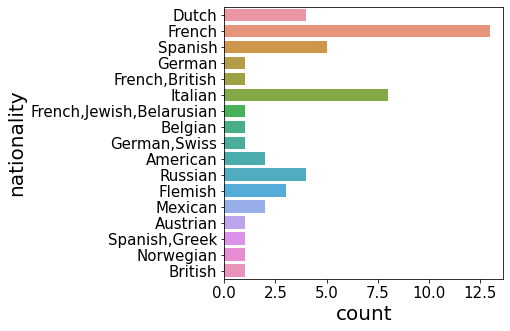

In [8]:
plt.figure(figsize=(5,5))
nationalityPlot = sns.countplot(y='nationality',data=artists)
nationalityPlot

In [9]:
path = '/content/drive/MyDrive/images/images'
dire = '/content/output/'
#shutil.rmtree(dire +'test_images/')
os.makedirs(dire +'test_images/')

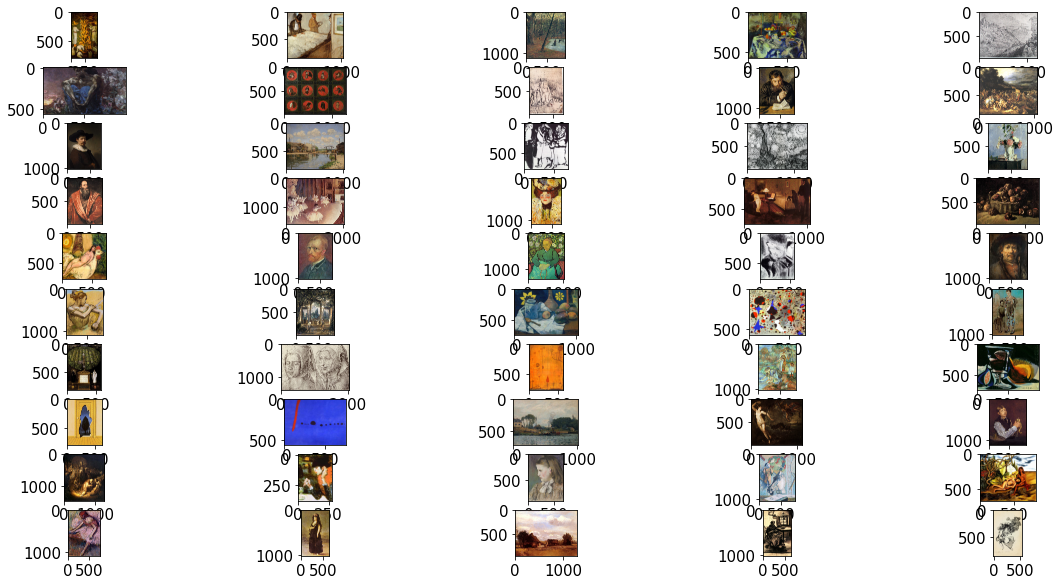

In [10]:
others=[]
#test images
destination = '/content/output/test_images'
plt.figure(figsize=(20,10))
for i in range(50):
    plt.subplot(10 , 5, i + 1)
    random_image = random.choice(os.listdir('/content/drive/MyDrive/images/images'))
    source = os.path.join('/content/drive/MyDrive/images/images', random_image)
    ime = plt.imread(source)
    plt.imshow(ime)
    others.append(source)
    shutil.copy(source, destination)

In [12]:
#shutil.rmtree(dire +'images/')
#shutil.rmtree('..output/images/train_and_validation/')
os.makedirs(dire +'images/')
os.makedirs('/content/output/images/train_and_validation/')

In [13]:
artists_name = artists['name'].str.replace(' ', '_').values
destination = '/content/output/images/train_and_validation/'
num_of_folders=len(artists_name)
for i in range (num_of_folders):
    os.makedirs(destination + artists_name[i] + '/')

In [14]:
length=len(others)
#train and validation images
columns = 5
for image in os.listdir('/content/drive/MyDrive/images/images'):
    l=len(image)
    is_test_img=0
    m=0
    k=0
    for k in range (l):
        if( (image[k]=='0') | (image[k]=='1') | (image[k]=='2') | (image[k]=='3') | (image[k]=='4') | (image[k]=='5') | (image[k]=='6') | (image[k]=='7') | (image[k]=='8') | (image[k]=='9') ):
            m=k-1
            break
    imm=image[0:m]
    source = os.path.join('/content/drive/MyDrive/images/images', image)
    destination = '/content/output/images/train_and_validation/' + imm + '/'
    if(image[0:7]=="Albrech"):
        destination = '/content/output/images/train_and_validation/Albrecht_Durer/'
    j=0
    #print(source)
    for j in range (length):
        if(others[j]==source):
            is_test_img=1
    if(is_test_img==0):
        shutil.copy(source, destination)

In [15]:
def plotImages(artist,directory):
    print(artist)
    plt.figure(figsize=(20,10))
    for i in range(50):
      plt.subplot(10 , 5, i + 1)
      random_image = random.choice(os.listdir(directory))
      source = os.path.join(directory, random_image)
      ime = plt.imread(source)
      plt.axis('off')
      plt.imshow(ime)

Kazimir Malevich


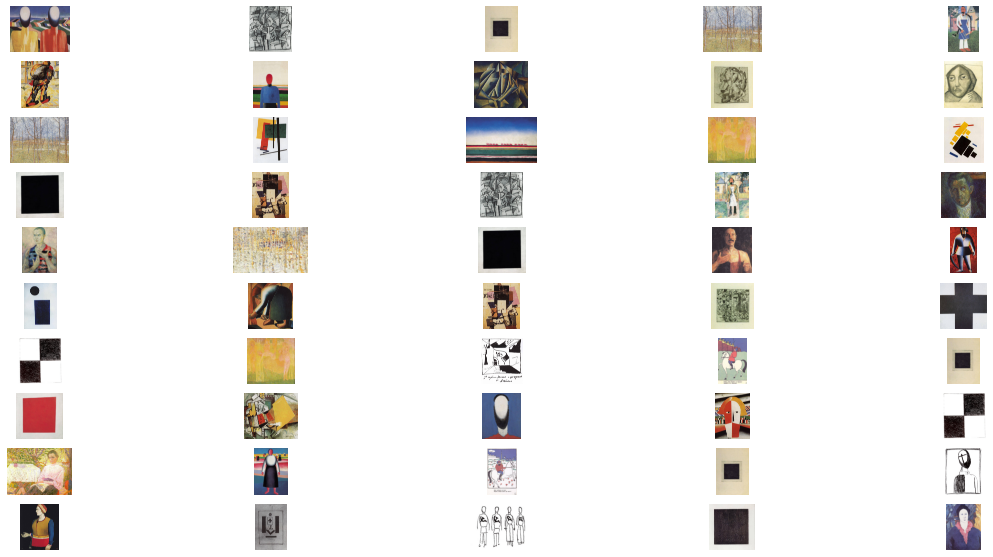

In [16]:
plotImages("Kazimir Malevich","/content/output/images/train_and_validation/Kazimir_Malevich/")

Edgar Degas


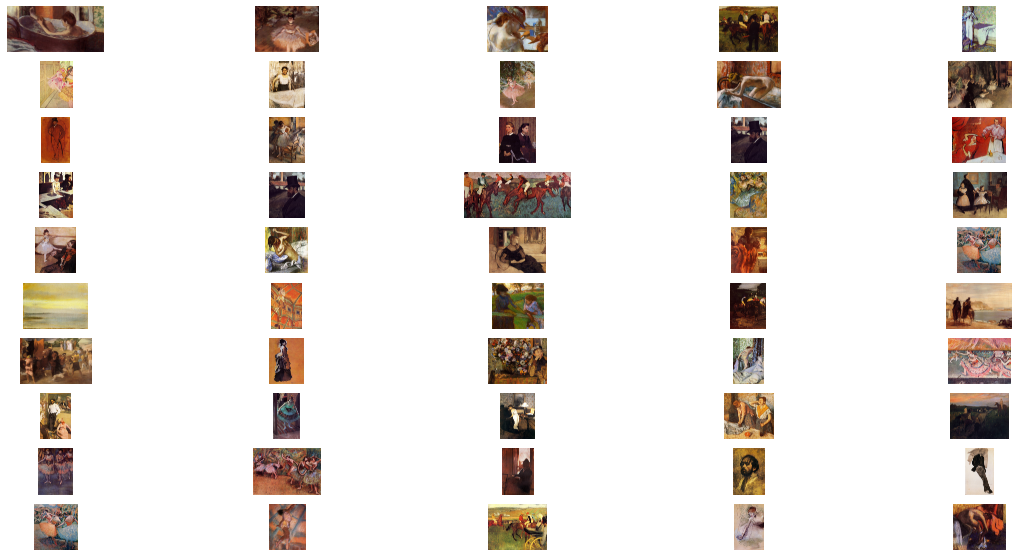

In [17]:
plotImages("Edgar Degas","/content/output/images/train_and_validation/Edgar_Degas/")

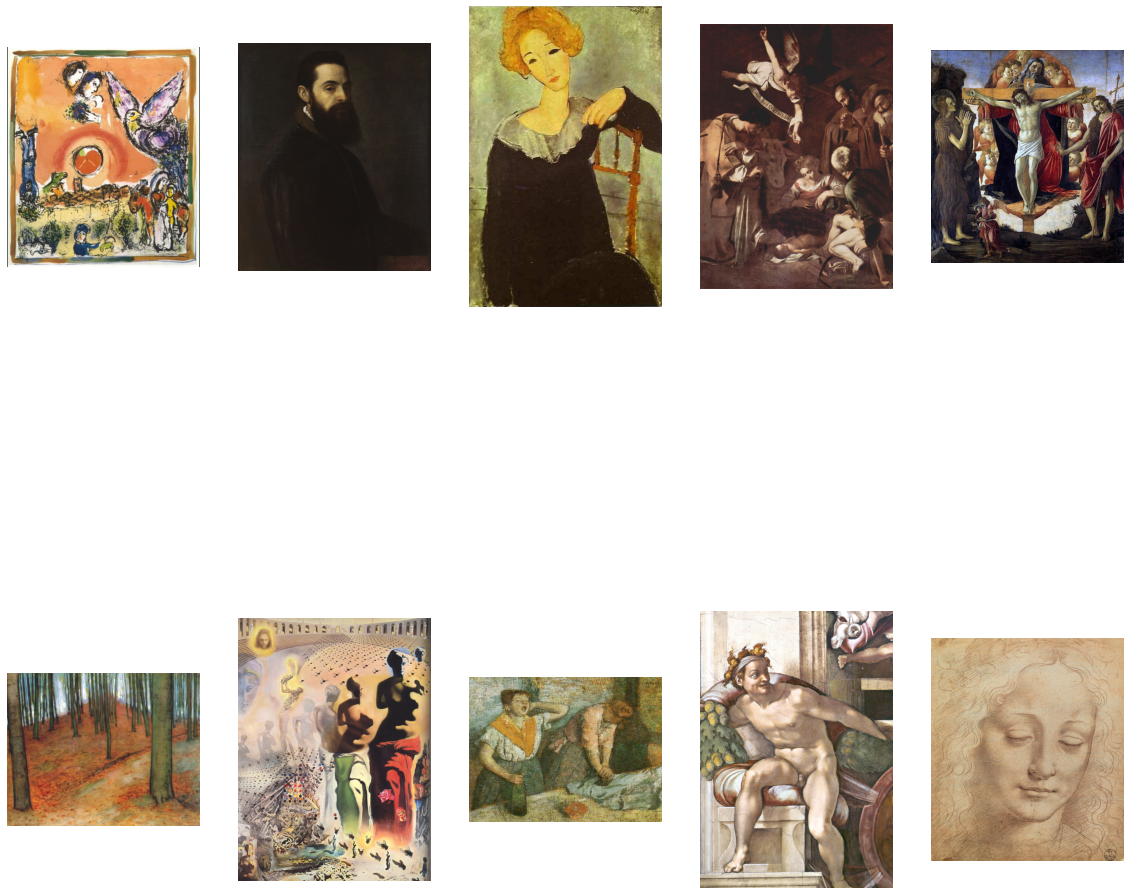

In [18]:
plt.figure(figsize=(20, 20))
for i in range(10):
    random_artist = random.choice(artists_name)
    random_image = random.choice(os.listdir(os.path.join('/content/output/images/train_and_validation/',random_artist+'/')))
    random_image_file = os.path.join('/content/output/images/train_and_validation/', random_artist, random_image)
    image = plt.imread(random_image_file)
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.axis("off")

plt.show()

In [19]:
artists_info = artists[['name', 'paintings']]
artists_info['class_weight'] = artists.paintings.sum() / (artists.shape[0] * artists.paintings)
artists_info

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


name  paintings  class_weight
8            Vincent van Gogh        877      0.192611
30                Edgar Degas        702      0.240627
13              Pablo Picasso        439      0.384784
15      Pierre-Auguste Renoir        336      0.502738
19             Albrecht Durer        328      0.515000
46               Paul Gauguin        311      0.543151
16             Francisco Goya        291      0.580481
31                  Rembrandt        262      0.644733
20              Alfred Sisley        259      0.652201
32                     Titian        255      0.662431
22               Marc Chagall        239      0.706778
4               Rene Magritte        194      0.870722
0           Amedeo Modigliani        193      0.875233
42                  Paul Klee        188      0.898511
28              Henri Matisse        186      0.908172
45                Andy Warhol        181      0.933260
12             Mikhail Vrubel        171      0.987836
24          Sandro Botticelli        164      1.030000
26          Leonardo da Vinci        143      1.181259
14          Peter Paul Rubens        141      1.198014
5               Salvador Dali        139      1.215252
10           Hieronymus Bosch        137      1.232993
21             Pieter Bruegel        134      1.260597
27            Diego Velazquez        128      1.319687
11           Kazimir Malevich        126      1.340635
17                Frida Kahlo        120      1.407667
23          Giotto di Bondone        119      1.419496
9                Gustav Klimt        117      1.443761
47                    Raphael        109      1.549725
44                  Joan Miro        102      1.656078
7               Andrei Rublev         99      1.706263
35           Camille Pissarro         91      1.856264
6               Edouard Manet         90      1.876889
1          Vasiliy Kandinskiy         88      1.919545
18                   El Greco         87      1.941609
43              Piet Mondrian         84      2.010952
33  Henri de Toulouse-Lautrec         81      2.085432
29               Jan van Eyck         81      2.085432
3                Claude Monet         73      2.313973
2                Diego Rivera         70      2.413143
40             Henri Rousseau         70      2.413143
37               Edvard Munch         67      2.521194
36             William Turner         66      2.559394
34            Gustave Courbet         59      2.863051
25                 Caravaggio         55      3.071273
48               Michelangelo         49      3.447347
38               Paul Cezanne         47      3.594043
41             Georges Seurat         43      3.928372
39           Eugene Delacroix         31      5.449032
49            Jackson Pollock         24      7.038333

In [20]:
# Augment data
batch_size = 16
train_input_shape = (224, 224, 3)
n_classes = artists_info.shape[0]
images_dir='/content/output/images/train_and_validation/'
datagen = ImageDataGenerator(validation_split=0.2,
                                   rescale=1./255.,
                                   shear_range=5,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                  )
print(n_classes)

50


In [21]:
artists_top_name = artists_info['name'].str.replace(' ', '_').values
artists_top_name

array(['Vincent_van_Gogh', 'Edgar_Degas', 'Pablo_Picasso',
       'Pierre-Auguste_Renoir', 'Albrecht_Durer', 'Paul_Gauguin',
       'Francisco_Goya', 'Rembrandt', 'Alfred_Sisley', 'Titian',
       'Marc_Chagall', 'Rene_Magritte', 'Amedeo_Modigliani', 'Paul_Klee',
       'Henri_Matisse', 'Andy_Warhol', 'Mikhail_Vrubel',
       'Sandro_Botticelli', 'Leonardo_da_Vinci', 'Peter_Paul_Rubens',
       'Salvador_Dali', 'Hieronymus_Bosch', 'Pieter_Bruegel',
       'Diego_Velazquez', 'Kazimir_Malevich', 'Frida_Kahlo',
       'Giotto_di_Bondone', 'Gustav_Klimt', 'Raphael', 'Joan_Miro',
       'Andrei_Rublev', 'Camille_Pissarro', 'Edouard_Manet',
       'Vasiliy_Kandinskiy', 'El_Greco', 'Piet_Mondrian',
       'Henri_de_Toulouse-Lautrec', 'Jan_van_Eyck', 'Claude_Monet',
       'Diego_Rivera', 'Henri_Rousseau', 'Edvard_Munch', 'William_Turner',
       'Gustave_Courbet', 'Caravaggio', 'Michelangelo', 'Paul_Cezanne',
       'Georges_Seurat', 'Eugene_Delacroix', 'Jackson_Pollock'],
      dtype=object)

In [22]:

train_generator = datagen.flow_from_directory(directory=images_dir,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="training",
                                                    shuffle=True,
                                                    classes=artists_top_name.tolist()
                                                   )

valid_generator = datagen.flow_from_directory(directory=images_dir,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="validation",
                                                    shuffle=True,
                                                    classes=artists_top_name.tolist()
                                                   )

STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
print("Total number of batches =", STEP_SIZE_TRAIN, "and", STEP_SIZE_VALID)

Found 6747 images belonging to 50 classes.
Found 1659 images belonging to 50 classes.
Total number of batches = 421 and 103


In [23]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=train_input_shape)

for layer in base_model.layers:
    layer.trainable = True

94773248/94765736 [==============================] - 1s 0us/step


In [24]:
# Add layers at the end
X = base_model.output
X = Flatten()(X)

X = Dense(512, kernel_initializer='he_uniform')(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

X = Dense(16, kernel_initializer='he_uniform')(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

output = Dense(n_classes, activation='softmax')(X)
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [25]:
model = Model(inputs=base_model.input, outputs=output)

In [26]:
#Compile the CNN
model.compile(optimizer = Adam(lr =0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


TRAIN

In [27]:
n_epoch = 7

early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1, 
                           mode='auto', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, 
                              verbose=1, mode='auto')

In [28]:
class_weights = artists_info['class_weight'].to_dict()

In [29]:
#class_weights

In [30]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=valid_generator, validation_steps=STEP_SIZE_VALID,
                              epochs=n_epoch,
                              shuffle=True,
                              verbose=1,
                              callbacks=[reduce_lr],
                              use_multiprocessing=True,
                              workers=16,
                              class_weight=class_weights
                             )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/7
421/421 [==============================] - 4861s 12s/step - loss: 4.8916 - accuracy: 0.2349 - val_loss: 3.8547 - val_accuracy: 0.0291
Epoch 2/7
421/421 [==============================] - 4947s 12s/step - loss: 4.2840 - accuracy: 0.3439 - val_loss: 3.6395 - val_accuracy: 0.1426
Epoch 3/7
421/421 [==============================] - 4945s 12s/step - loss: 3.8702 - accuracy: 0.3938 - val_loss: 2.8544 - val_accuracy: 0.3841
Epoch 4/7
421/421 [==============================] - 4833s 11s/step - loss: 3.5121 - accuracy: 0.4329 - val_loss: 2.6256 - val_accuracy: 0.4339
Epoch 5/7
421/421 [==============================] - 4909s 12s/step - loss: 3.1784 - accuracy: 0.4718 - val_loss: 2.6227 - val_accuracy: 0.4254
Epoch 6/7
421/421 [==============================] - 4882s 12s/step - loss: 2.9145 - accuracy: 0.4986 - val_loss: 2.6008 - val_accuracy: 0.424

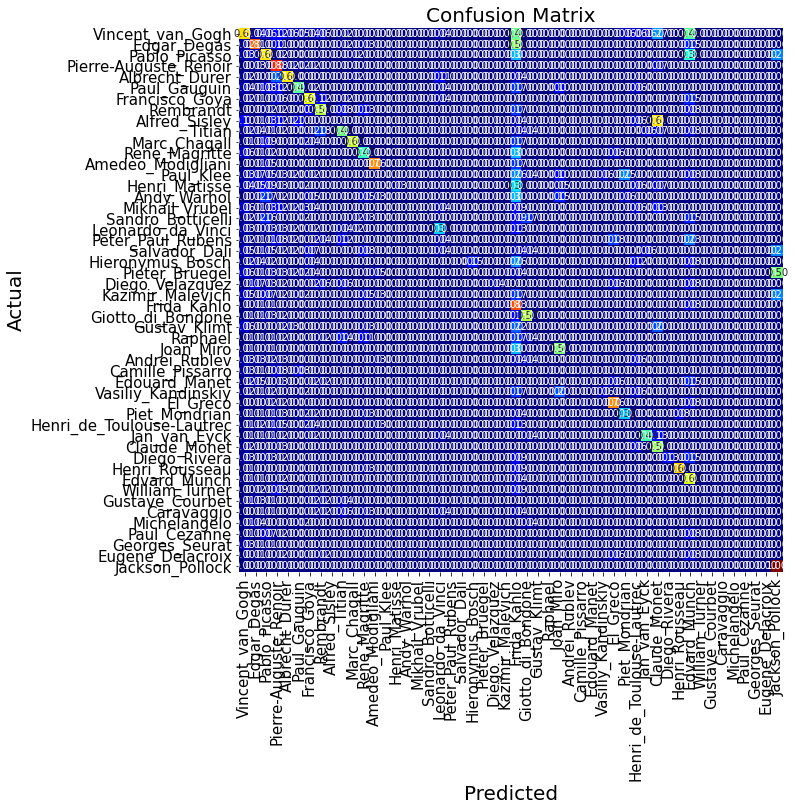

Classification Report:
                           precision    recall  f1-score   support

         Vincent_van_Gogh       0.38      0.67      0.49       172
              Edgar_Degas       0.50      0.81      0.62       138
            Pablo_Picasso       0.32      0.67      0.43        87
    Pierre-Auguste_Renoir       0.35      0.88      0.50        66
           Albrecht_Durer       0.75      0.66      0.70        65
             Paul_Gauguin       0.50      0.47      0.48        60
           Francisco_Goya       0.49      0.62      0.55        56
                Rembrandt       0.50      0.57      0.53        51
            Alfred_Sisley       0.00      0.00      0.00        50
                   Titian       0.44      0.49      0.47        49
             Marc_Chagall       0.88      0.60      0.71        47
            Rene_Magritte       0.42      0.42      0.42        38
        Amedeo_Modigliani       0.83      0.76      0.79        38
                Paul_Klee       0.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.metrics import *
import seaborn as sns
tick_labels = artists_top_name.tolist()

def showClassficationReport_Generator(model, valid_generator, STEP_SIZE_VALID):
    # Loop on each generator batch and predict
    y_pred, y_true = [], []
    for i in range(STEP_SIZE_VALID):
        (X,y) = next(valid_generator)
        y_pred.append(model.predict(X))
        y_true.append(y)
    
    # Create a flat list for y_true and y_pred
    y_pred = [subresult for result in y_pred for subresult in result]
    y_true = [subresult for result in y_true for subresult in result]
    
    # Update Truth vector based on argmax
    y_true = np.argmax(y_true, axis=1)
    y_true = np.asarray(y_true).ravel()
    
    # Update Prediction vector based on argmax
    y_pred = np.argmax(y_pred, axis=1)
    y_pred = np.asarray(y_pred).ravel()
    
    # Confusion Matrix
    fig, ax = plt.subplots(figsize=(10,10))
    conf_matrix = confusion_matrix(y_true, y_pred, labels=np.arange(n_classes))
    conf_matrix = conf_matrix/np.sum(conf_matrix, axis=1)
    sns.heatmap(conf_matrix, annot=True, fmt=".2f", square=True, cbar=False, 
                cmap=plt.cm.jet, xticklabels=tick_labels, yticklabels=tick_labels,
                ax=ax)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title('Confusion Matrix')
    plt.show()
    
    print('Classification Report:')
    print(classification_report(y_true, y_pred, labels=np.arange(n_classes), target_names=artists_top_name.tolist()))

showClassficationReport_Generator(model, valid_generator, STEP_SIZE_VALID)


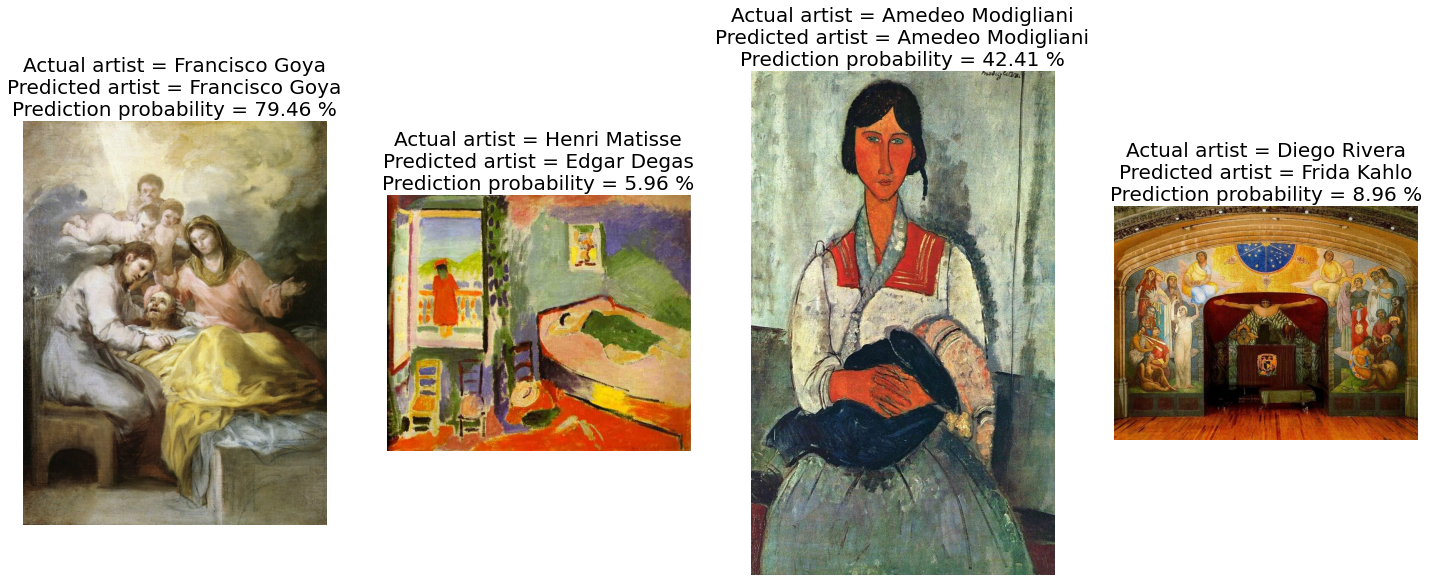

In [33]:
# Prediction
from keras.preprocessing import *

n = 4
fig, axes = plt.subplots(1, n, figsize=(25,10))

for i in range(n):
    random_artist = random.choice(artists_name)
    random_image = random.choice(os.listdir(os.path.join('/content/output/images/train_and_validation/',random_artist+'/')))
    random_image_file = os.path.join('/content/output/images/train_and_validation/', random_artist, random_image)

    # Original image

    test_image = image.load_img(random_image_file, target_size=(train_input_shape[0:2]))

    # Predict artist
    test_image = image.img_to_array(test_image)
    test_image /= 255.
    test_image = np.expand_dims(test_image, axis=0)

    prediction = model.predict(test_image)
    prediction_probability = np.amax(prediction)
    prediction_idx = np.argmax(prediction)

    labels = train_generator.class_indices
    labels = dict((v,k) for k,v in labels.items())

    title = "Actual artist = {}\nPredicted artist = {}\nPrediction probability = {:.2f} %" \
                .format(random_artist.replace('_', ' '), labels[prediction_idx].replace('_', ' '),
                        prediction_probability*100)

    # Print image
    axes[i].imshow(plt.imread(random_image_file))
    axes[i].set_title(title)
    axes[i].axis('off')

plt.show()

Text(0.5, 1.0, 'Training - Loss Function')

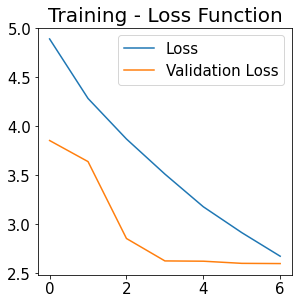

In [34]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

Text(0.5, 1.0, 'Train - Accuracy')

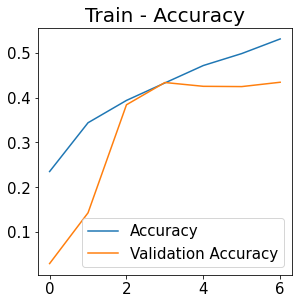

In [38]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

BU KISIMDAN SONRASI ZAMAN AŞIMI SEBEBİYLE ÇALIŞMIYOR

In [ ]:
for layer in model.layers:
    layer.trainable = False

for layer in model.layers[:50]:
    layer.trainable = True

optimizer = Adam(lr=0.0001)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

n_epoch = 5
history2 = model.fit_generator(generator=train_generator, steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=valid_generator, validation_steps=STEP_SIZE_VALID,
                              epochs=n_epoch,
                              shuffle=True,
                              verbose=1,
                              callbacks=[reduce_lr, early_stop],
                              use_multiprocessing=True,
                              workers=16,
                              class_weight=class_weights
                             )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
421/421 [==============================] - 3952s 9s/step - loss: 1.8826 - accuracy: 0.6062 - val_loss: 2.3013 - val_accuracy: 0.4873
Epoch 2/5
 47/421 [==>...........................] - ETA: 53:14 - loss: 1.8514 - accuracy: 0.5891

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history2.history['loss'], label='Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 2)
plt.plot(history2.history['accuracy'], label='Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
os.makedirs('/content/output/images_test/test_images/')
artists_name = artists_top['name'].str.replace(' ', '_').values
destination = '/content/output/images_test/test_images/'
num_of_folders=len(artists_name)
for i in range (num_of_folders):
  os.makedirs(destination + artists_name[i] + '/')

In [ ]:
for image in os.listdir('/content/output/test_images'):
  if( (image[0:7]=='Vincent') | (image[0:7]=='Albrech') | (image[0:11]=='Edgar_Degas') | (image[0:5]=='Pablo') | (image[0:6]=='Pierre') | (image[0:12]=='Paul_Gauguin') | (image[0:14]=='Francisco_Goya') | (image[0:9]=='Rembrandt') | (image[0:13]=='Alfred_Sisley') | (image[0:6]=='Titian') | (image[0:12]=='Marc_Chagall') ):
    l=len(image)
    is_test_img=0
    m=0
    k=0
    for k in range (l):
      if( (image[k]=='0') | (image[k]=='1') | (image[k]=='2') | (image[k]=='3') | (image[k]=='4') | (image[k]=='5') | (image[k]=='6') | (image[k]=='7') | (image[k]=='8') | (image[k]=='9') ):
        m=k-1
        break
    imm=image[0:m]
    source = os.path.join('/content/drive/MyDrive/images/images', image)
    destination = '/content/output/images_test/' + imm
    if(image[0:7]=="Albrech"):
        destination = '/content/output/images_test/Albrecht_Durer'
    shutil.copy(source, destination)

In [ ]:
images_dir='/content/output/images_test/test_images/'

datagen = ImageDataGenerator(validation_split=0.0,
                                   rescale=1./255.,
                                   #rotation_range=45,
                                   #width_shift_range=0.5,
                                   #height_shift_range=0.5,
                                   #shear_range=5,
                                   #zoom_range=0.7,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                  )

In [ ]:
test_generator = datagen.flow_from_directory(directory=images_dir,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=4,
                                                    subset="training",
                                                    shuffle=True,
                                                    classes=artists_top_name.tolist()
                                                   )
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size

In [ ]:
n = 5
fig, axes = plt.subplots(1, n, figsize=(25,10))

for i in range(n):
    random_image = random.choice(os.listdir('/content/output/test_images'))
    random_image_file = os.path.join('/content/output/test_images', random_image)

    # Original image

    test_image = image.load_img(random_image_file, target_size=(train_input_shape[0:2]))

    # Predict artist
    test_image = image.img_to_array(test_image)
    test_image /= 255.
    test_image = np.expand_dims(test_image, axis=0)

    prediction = model.predict(test_image)
    prediction_probability = np.amax(prediction)
    prediction_idx = np.argmax(prediction)

    labels = train_generator.class_indices
    labels = dict((v,k) for k,v in labels.items())

    l=len(random_image)
    m=0
    k=0
    for k in range (l):
      if( (random_image[k]=='0') | (random_image[k]=='1') | (random_image[k]=='2') | (random_image[k]=='3') | (random_image[k]=='4') | (random_image[k]=='5') | (random_image[k]=='6') | (random_image[k]=='7') | (random_image[k]=='8') | (random_image[k]=='9') ):
        m=k-1
        break
    imm=random_image[0:m]
    title = "Actual artist = {}\nPredicted artist = {}\nPrediction probability = {:.2f} %" \
                .format(imm.replace('_', ' '), labels[prediction_idx].replace('_', ' '),
                        prediction_probability*100)

    # Print image
    axes[i].imshow(plt.imread(random_image_file))
    axes[i].set_title(title)
    axes[i].axis('off')

plt.show()